### LSE Data Analytics Online Career Accelerator

# Course 2 Assignment: Data Analytics using Python

## Summary of the scenario:

A team of data analysts has been contracted by the NHS (National Healthcare Service) and provided with external and internal data. Their task is to,

1.	Investigate the utilisation trends of its different services and components with the increase in population, so that it may help the NHS to allot the budget accordingly. 
2.	Know if there has been adequate staff and capacity in the networks.
3.	Look at the potential value of using X, formerly known as Twitter. 
4.	Understand the reasons for the missed appointments by patients and how they can be reduced and eliminated as missed appointments cost NHS avoidable amount of money. 

### The Analysts have been asked to analyse the data to answer the following questions:
1. 	What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
2. What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
3. What is the number of appointments and records per month?
4. What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
5. What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
6. Was there adequate staff and capacity in the networks?
7.	What was the actual utilisation of resources?
8.	What insights can be gained by looking at missed appointments?
9.	What are the most important patterns visible in the data relating to the use case? 
10. What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?


### Summary of the data and files: 

1.	There are 5 files. The actual_duration.csv has 137,793 rows. Has 8 columns sub_icb_location_code, sub_icb_location_ons_code, sub_icb_location_name, icb_ons_code, region_ons_code, appointment_date, actual_duration and count_of_appointments. It has details of appointments made by patients. For example, the regional information, date, duration, and number of appointments pertaining to a certain class.
2.	The appointments_regional.csv has 596,821 rows and 7 columns namely, icb_ons_code, appointment_month, appointment_status, hcp_type, appointment_mode, time_between_book_and_appointment and count_of_appointments. Details on the type of appointments made by patients. For example, regional information, the month of appointment, appointment status, healthcare professional, appointment mode, the time between booking and the appointment, as well as the number of appointments pertaining to a certain class.
3.	The tweets.csv has 1174 rows and 10 columns namely, tweet_id, tweet_full_text, tweet_entities, tweet_entities_hashtags, tweet_metadata, tweet_retweet_count, tweet_favorite_count, tweet_favorited, tweet_retweeted and tweet_lang. It has data related to healthcare in the UK scraped from Twitter.
4.	The national_categories.xlsx – Details of the national categories of appointments made by patients. For example, the regional information, date of appointment, service setting, type of context, national category, and the number of appointments pertaining to a certain class. It has 917395 rows and 8 columns - appointment_date, sub_icb_location_name, service_setting, context_type, national_category, count_of_appointments and appointment_month. 
5.	metadata_nhs.txt – Details of the data set, data quality, and reference.



# 

## Step 1: Familiarising with the data.

To familiarise with the data, I performed analysis of the three files - 'actual_duration.csv', 'appointment_regional.csv' and 'national_categories.xlsx'. There was another csv files called 'tweets.csv' which I analysed further down. As a first step, I imported all the necessary libraries including Pandas, Numpy, Seaborn and Matplotlib. To remove any possible error messages, I also imported the 'warnings' library. 

I used the Pandas functions to import the files as dataframes. Then I sense checked them using the shape, dtypes and columns methods. Using the info() function I confirmed the metadata information before using the describe() function, which can only work for integer data types. After checking for the any missing values using the isna() function, I executed the files to retrieve the first 5 rows using head() function. 



### Analysis of 'actual_duration.csv'

In [743]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [745]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# Validate if file has been imported successfully
print(ad.shape)
print(ad.columns)
print(ad.dtypes)

# View the DataFrame.
print(ad.head())

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E4

In [747]:
# Determine whether there are missing values.
ad_null = ad[ad.isna().any(axis=1)]

# Print to check if there are missing values.
ad_null.shape

(0, 8)

In [749]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [751]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


### Analysis of 'appointments_regional.csv' file.

In [753]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# Validate if file has been imported successfully
print(ar.shape)
print(ar.columns)
print(ar.dtypes)

# View the DataFrame.
print(ar.head())

(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP    

In [755]:
# Determine whether there are missing values.
ar_null = ar[ar.isna().any(axis=1)]

# Print to check if there are missing values.
ar_null.shape


(0, 7)

In [757]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [759]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


### Analysis of 'national_categories.xlsx' file.

In [264]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# Validate if file has been imported successfully
print(nc.shape)
print(nc.columns)
print(nc.dtypes)

# View the DataFrame.
print(nc.head())

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and 

In [218]:
# Determine whether there are missing values.
nc_null = nc[nc.isna().any(axis=1)]

# Print to check if there are missing values.
nc_null.shape

(0, 8)

In [22]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [126]:
# Determine the descriptive statistics of the data set.
# Apply describe() on just one column.
print(nc['count_of_appointments'].describe())

count    817394.000000
mean        362.183684
std        1084.576600
min           1.000000
25%           7.000000
50%          25.000000
75%         128.000000
max       16590.000000
Name: count_of_appointments, dtype: float64


## Step 2: Exploring the data set.

**Question 1:** How many locations are there in the data set?


To determine the number of locations, use value_counts() on column 'sub_icb_location_code' in national_categories.xlsx

In [128]:
# Determine the number of locations.
#nc['sub_icb_location_name'].value_counts()

print("Names and counts of locations: ", "  ",  nc['sub_icb_location_name'].value_counts(ascending=True))

Names and counts of locations:     sub_icb_location_name
NHS Greater Manchester ICB - 00V                2170
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS North East and North Cumbria ICB - 00N      4210
                                               ...  
NHS North East London ICB - A3A8R              11837
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS Devon ICB - 15N                            12526
NHS Kent and Medway ICB - 91Q                  12637
NHS North West London ICB - W2U3Z              13007
Name: count, Length: 106, dtype: int64


**Question 2:** What are the five locations with the highest number of appointments?

I used the groupby() function with 'sub_icb_location_name' column before aggregating the count of appointments, and the using the sort_values() to output the result based on the count of appointments in the descending order.  

In [130]:
# Determine the top five locations based on record count.
# Sort the highest appointment counts in descending order
nc.groupby('sub_icb_location_name')[['count_of_appointments']].sum() \
.sort_values('count_of_appointments', ascending=False)

,count_of_appointments
sub_icb_location_name,
NHS North West London ICB - W2U3Z,12142390
NHS North East London ICB - A3A8R,9588891
NHS Kent and Medway ICB - 91Q,9286167
NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
NHS South East London ICB - 72Q,7850170
...,...
NHS Cheshire and Merseyside ICB - 01V,641149
NHS Nottingham and Nottinghamshire ICB - 02Q,639660
NHS Greater Manchester ICB - 00V,639211


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

To answer this question, I used the value_counts() on all three columns.

In [132]:
# Determine the number of service settings.
print("Number of service settings by Categories: ", nc['service_setting'].value_counts())

Number of service settings by Categories:  service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [134]:
# Determine the number of context types.
print("Number of Context Types: ", nc['context_type'].value_counts())

Number of Context Types:  context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64


In [136]:
# Determine the number of national categories.
print("Number of National Categories: ", "                           \
", nc['national_category'].value_counts())

Number of National Categories:                              national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               2741

In [138]:
# Determine the number of appointment statuses.
print("Appointment Status: ", ar['appointment_status'].value_counts())

Appointment Status:  appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


## Summary of Findings and Insights gathered:

To answer the questions about counts of locations, and the number of service settings, context types and national categories, national_categories.xlsx file was used in analysis. For appointment status number, appointments_regional.csv was used with value.counts() function. To find the top five locations by record counts, groupby() and sum() functions were used with sort_values() function. 
The analysis shows that there are 106 locations. The top five locations based on record counts are NHS North West London ICB, NHS North East London ICB, NHS Kent and Medway ICB, NHS Hampshire and Isle of Wight ICB and NHS South East London ICB in descending order.

The service settings are sub-grouped into five categories – General Practice, Primary Care Network, Other, Extended Access Provision and Unmapped in descending order of number.

There are 18 types of  National Categories,which are further divided into 3 context types: Care Related Encounter that involve the appointment with the patient were the among the highest recorded (700481) followed by inconsistent mapping and Unmapdpe 2/3rds of the data for national category column has been assigned to inconsistent mapping.Some of the data in this category has not been assigned to any predefined category and hence exists in inconsistent mapping. The way this data has been recorded poses data quality issues
d.

There are 3 categories in Appointment Status: There were 232137 Attended appointments recorded, while 201324 were in the unknown category and 163360 were DNA , short for 'Did not attend'. 



## Step 3: Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 


In [140]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [142]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [144]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [146]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print("The earliest date of scheduled appointments is: ", ad['appointment_date'].min())
print("The latest date of scheduled appointments is: ", ad['appointment_date'].max())

The earliest date of scheduled appointments is:  2021-12-01 00:00:00
The latest date of scheduled appointments is:  2022-06-30 00:00:00


In [148]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print("The earliest date of scheduled appointments is: ", nc['appointment_date'].min())
print("The latest date of scheduled appointments is: ", nc['appointment_date'].max())

The earliest date of scheduled appointments is:  2021-08-01 00:00:00
The latest date of scheduled appointments is:  2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [150]:
# First, filter the DataFrame for the required ICB location and date range
nc_subset = nc[
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
    (nc['appointment_date'] >= '2022-01-01') &
    (nc['appointment_date'] <= '2022-06-01')
]

# Group by service setting and calculate the total sum of appointments
service_total = nc_subset.groupby('service_setting')['count_of_appointments'].sum().reset_index()

# Sort the result by the number of appointments in descending order
service_total = service_total.sort_values('count_of_appointments', ascending=False)

# Identify the service setting with the highest number of appointments
max_service_setting = service_total.loc[service_total['count_of_appointments'].idxmax(), 'service_setting']

# Count the total number of appointments at the highest service setting.
app_total = service_total.loc[service_total['count_of_appointments'].idxmax(), 'count_of_appointments']

# Print the sorted service totals
print(service_total)

# Output the service setting with the highest number of appointments
# Output the service setting with the highest number of appointments and the count
print(f"Service Setting with the highest number of appointments: {max_service_setting}")
print(f"Number of appointments at this service setting: {app_total}")

             service_setting  count_of_appointments
1           General Practice                4804239
4                   Unmapped                 391106
2                      Other                 152897
3       Primary Care Network                 109840
0  Extended Access Provision                  98159
Service Setting with the highest number of appointments: General Practice
Number of appointments at this service setting: 4804239


**Question 3:** Which month had the highest number of appointments?

In [152]:
# Determine the total number of appointments per month with the sum() function.
# Use the groupby() method based on year and month. Sort by number of appointments.

month_app = nc.groupby([pd.to_datetime(nc['appointment_month']).dt.year,
                       pd.to_datetime(nc['appointment_month']).dt.month,
                      'appointment_month']).agg({'count_of_appointments': sum})\
                      .sort_values('count_of_appointments', ascending=False)

total_app = month_app['count_of_appointments'].max()





print(f'The highest number of appointments of appointments were', total_app, 'and November 2011 was the most popular month')
# Print the results
print(month_app)
#print(f'The highest number of appointments was {total_app}, and # was the most popular month.')



The highest number of appointments of appointments were 30405070 and November 2011 was the most popular month
                                                       count_of_appointments
appointment_month appointment_month appointment_month                       
2021              11                2021-11                         30405070
                  10                2021-10                         30303834
2022              3                 2022-03                         29595038
2021              9                 2021-09                         28522501
2022              5                 2022-05                         27495508
                  6                 2022-06                         25828078
                  1                 2022-01                         25635474
                  2                 2022-02                         25355260
2021              12                2021-12                         25140776
2022              4                 2022-04

**Question 4:** What was the total number of records per month?

In [154]:
# Determine the total number of appointments per month with the sum() function.
# Use the groupby() method based on year and month. Sort by number of appointments.

month_app = nc.groupby([pd.to_datetime(nc['appointment_month']).dt.year,
                       pd.to_datetime(nc['appointment_month']).dt.month,
                      'appointment_month']).agg({'count_of_appointments': sum})\
                      .sort_values('count_of_appointments', ascending=False)

month_app


count_of_appointments
appointment_month appointment_month appointment_month                       
2021              11                2021-11                         30405070
                  10                2021-10                         30303834
2022              3                 2022-03                         29595038
2021              9                 2021-09                         28522501
2022              5                 2022-05                         27495508
                  6                 2022-06                         25828078
                  1                 2022-01                         25635474
                  2                 2022-02                         25355260
2021              12                2021-12                         25140776
2022              4                 2022-04                         23913060
2021              8                 2021-08                         23852171

### Summary of Findings and Insights gathered:

I first viewd the first five rows of the appointment_date columns in ad and nc dataframes. And found that appointment_date column in nc was not in the proper datetime format. I changed that. Then using the min(0 and max() functions, I printed out the minimum and maximum dates in the two dataframes. The ad dataframe records data from 1st December 2021 to 30th June 2022, while nc dataframe records data from 1st August 2021 to 30th June 2022.

To answer the rest of the questions, I used the nc dataframe (national_categories.xlsx). I used the groupby() and filter statement to find the most popular service setting for NHS North West London from 1 January to 1 June 2022. It was General Practice with 4804239 counts of appointments.

The total number of appointments for each month was retrieved using the grouppby() and it showed that the highest number of appointments (30405070) were recorded in November 2021.

## Step 4: Create visualisations and identify possible monthly and seasonal trends in the data.

I imported the Seaborn and Matplotlib libraries. I set the plot figure size to (15,12) and plot style as white.

The objective was to,

1. Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.2. 
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022)

3. To achieve this, I first changed the data type for 'appointment_date' column for all dataframes to string for easy visualisation. Then for each plot I first created dataframe variable using the groupby() and sum() for 'counts_of_appointments'. Then using Seaborn library, I plotted 3 lineplots to show the relationship between number of total appointments per month and service settings, context types, and national categories. I also saved the plots to png format using the savefig(). 

In [234]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [158]:
# Step 1: Change the data type of the appointment month to string to allow for easier plotting.
# Convert the 'appointment_date' column to string format (YYYY-MM-DD)
nc['appointment_date_str'] = nc['appointment_month'].astype(str)

print(nc['appointment_date_str'])

0         2021-08
1         2021-08
2         2021-08
3         2021-08
4         2021-08
           ...   
817389    2022-06
817390    2022-06
817391    2022-06
817392    2022-06
817393    2022-06
Name: appointment_date_str, Length: 817394, dtype: object


In [54]:
# Step 2: Group by the monthly period and service settings, then sum the count_of_appointments
nc_ss = nc.groupby(['appointment_month', 'service_setting']).agg({'count_of_appointments': 'sum'}).reset_index().copy()

# Step 3: View the new DataFrame
print(nc_ss)

   appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13    

**Service settings:**

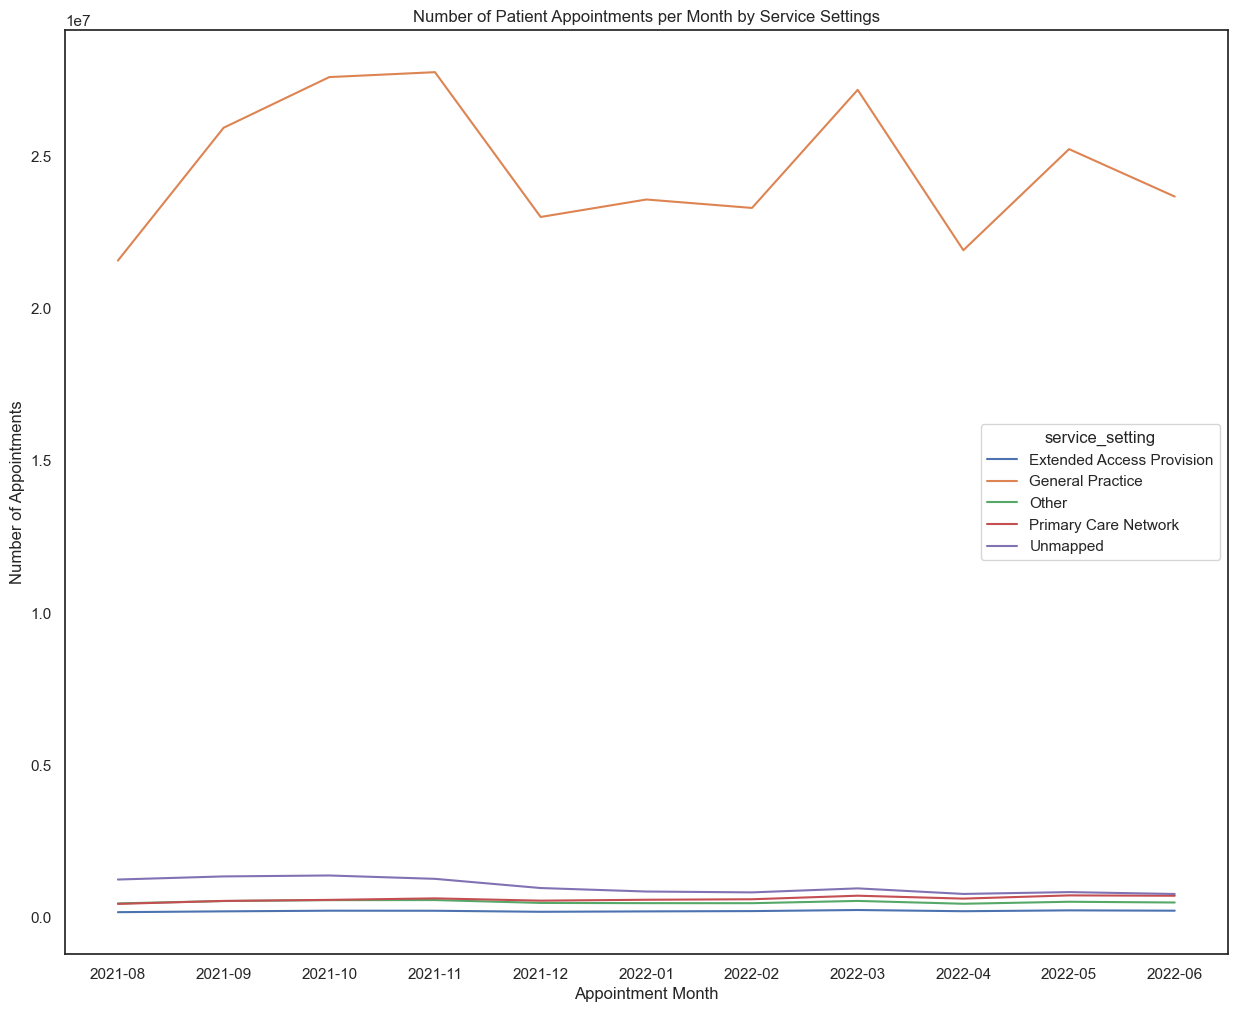

In [332]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
fig, ss = plt.subplots()
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, errorbar=None)

# Format the title and x and y axes labels
ss.set_title("Number of Patient Appointments per Month by Service Settings")
ss.set_xlabel("Appointment Month")
ss.set_ylabel("Number of Appointments")

# Save the file in .png format
fig.savefig('service_setting.png', dpi=300)

**Context types:**

In [763]:
# Group by monthly period and context type the total number of appointments.
nc_ct = nc.groupby(['appointment_month', 'context_type']).agg({'count_of_appointments': 'sum'}).reset_index().copy()

# Step 3: View the new DataFrame
print(nc_ct)


   appointment_month            context_type  count_of_appointments
0            2021-08  Care Related Encounter               20255235
1            2021-08    Inconsistent Mapping                2363093
2            2021-08                Unmapped                1233843
3            2021-09  Care Related Encounter               24404251
4            2021-09    Inconsistent Mapping                2782135
5            2021-09                Unmapped                1336115
6            2021-10  Care Related Encounter               26125201
7            2021-10    Inconsistent Mapping                2811977
8            2021-10                Unmapped                1366656
9            2021-11  Care Related Encounter               26282778
10           2021-11    Inconsistent Mapping                2865796
11           2021-11                Unmapped                1256496
12           2021-12  Care Related Encounter               21798612
13           2021-12    Inconsistent Mapping    

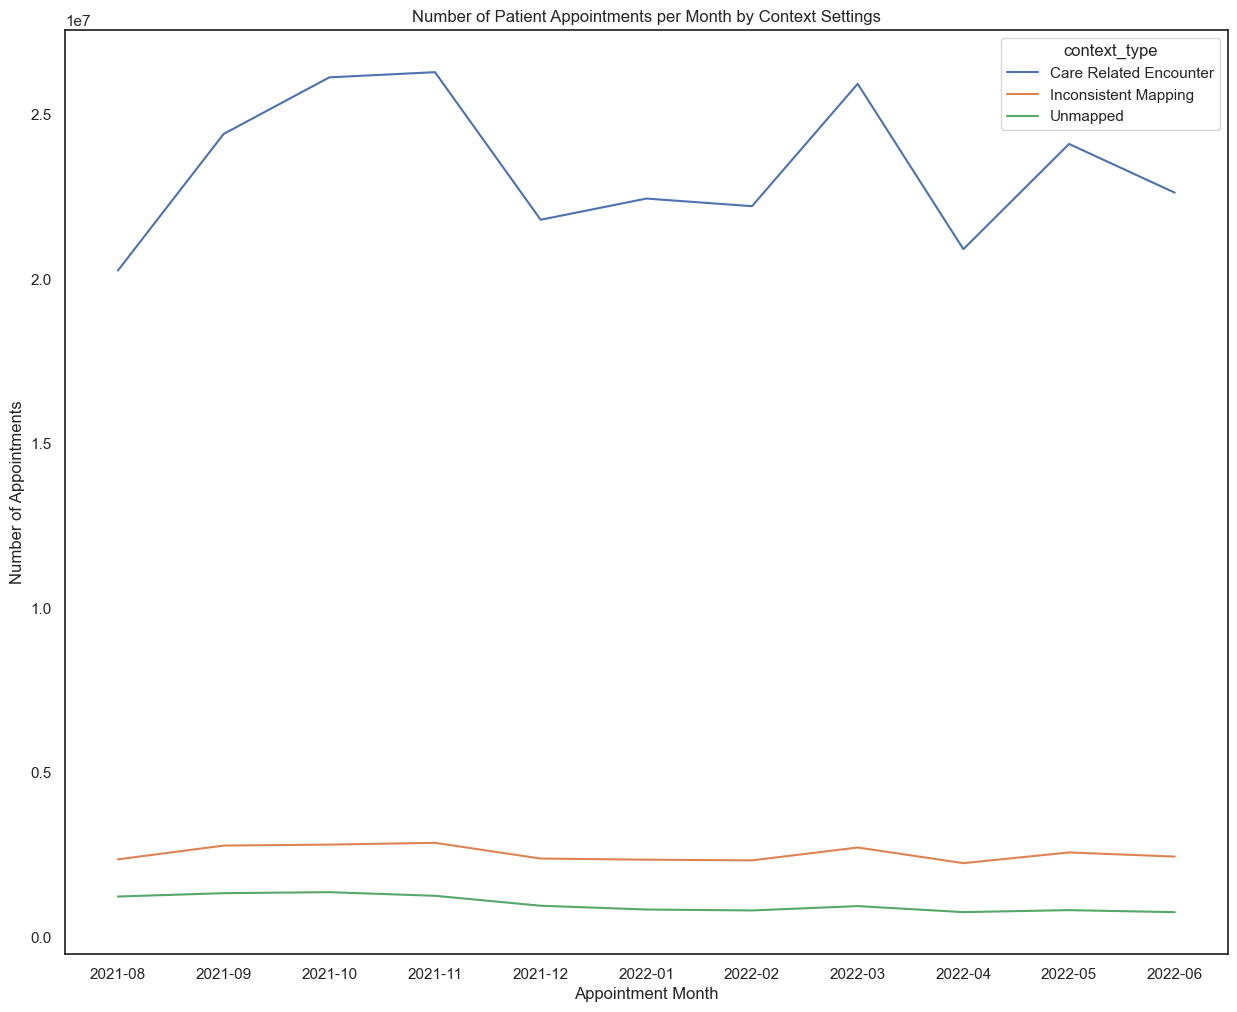

In [334]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
fig, ct = plt.subplots()
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct, errorbar=None)

# Format the title and x and y axes labels
ct.set_title("Number of Patient Appointments per Month by Context Settings")
ct.set_xlabel("Appointment Month")
ct.set_ylabel("Number of Appointments")

# Save the file in .png format
fig.savefig('context_setting.png', dpi=300)

**National categories:**

In [220]:
# Create a separate data set that can be used in future weeks. 
# Group by monthly period and national categories the total number of appointments.
nc_nc = nc.groupby(['appointment_month', 'national_category']).agg({'count_of_appointments': 'sum'}).reset_index().copy()

# Step 3: View the new DataFrame
print(nc_nc)


    appointment_month                                  national_category  \
0             2021-08  Care Home Needs Assessment & Personalised Care...   
1             2021-08                                    Care Home Visit   
2             2021-08                                    Clinical Triage   
3             2021-08                         General Consultation Acute   
4             2021-08                       General Consultation Routine   
..                ...                                                ...   
193           2022-06                         Social Prescribing Service   
194           2022-06                       Structured Medication Review   
195           2022-06                                           Unmapped   
196           2022-06                        Unplanned Clinical Activity   
197           2022-06                                            Walk-in   

     count_of_appointments  
0                    29676  
1                    47583  


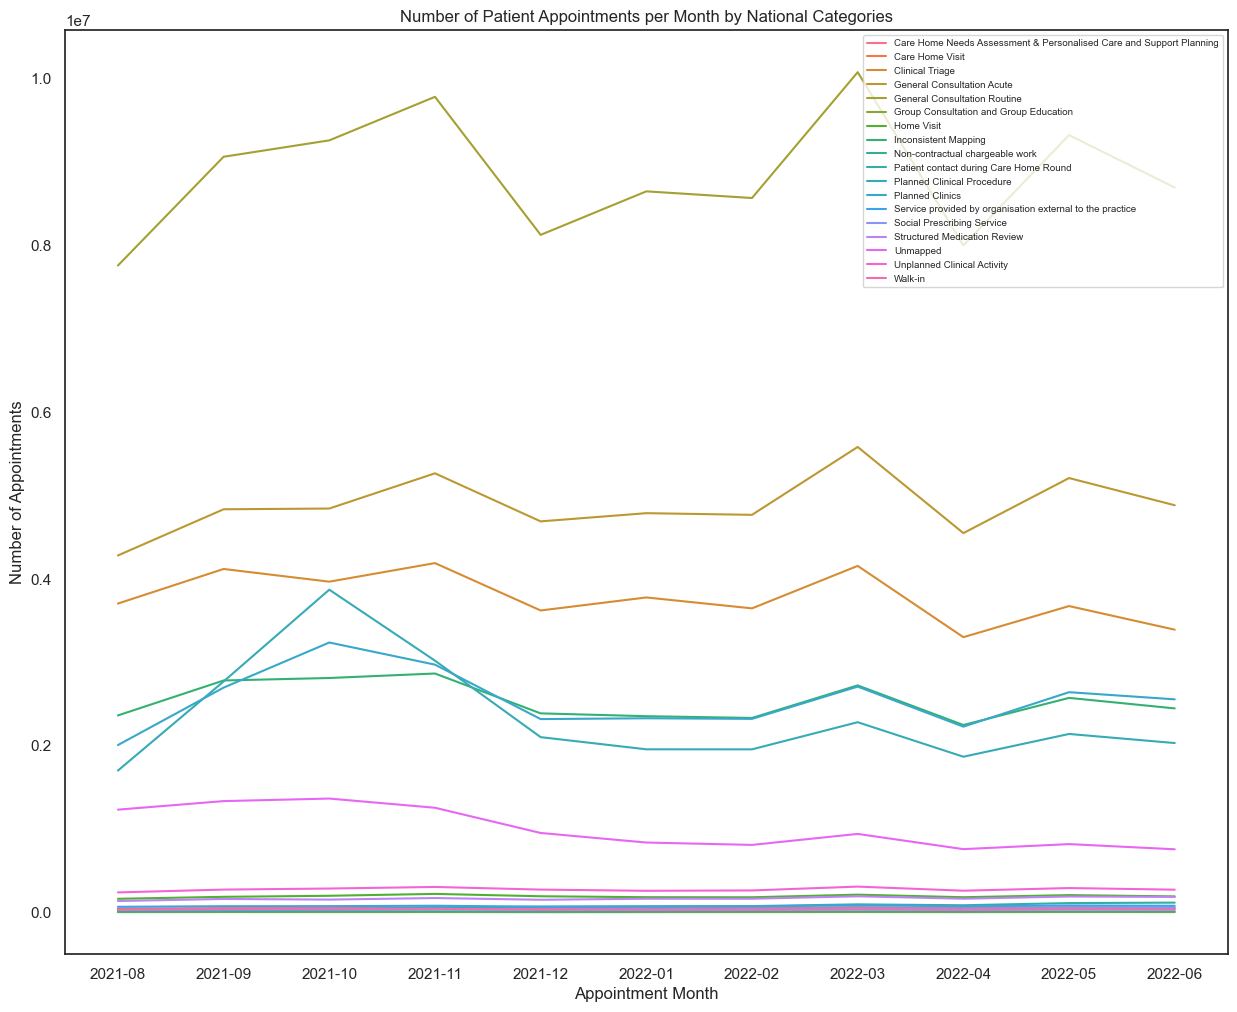

In [336]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Number of Patient Appointments per Month by National Categories")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of Appointments")

# Adjust the legend.
# Create legend.
ax.legend()

# Specify legend position.
#nc.legend(loc='center left')
ax.legend(fontsize=7)
plt.show()

# Save the file in .png format
fig.savefig('national_setting.png', dpi=300)

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [874]:
# Number of appointments in the Summer quarter in each service categories
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['service_setting','appointment_month', 'appointment_date']).agg({'count_of_appointments': 'sum'}).reset_index().copy()

nc_ss_q1 = nc_ss_day[(nc_ss_day['appointment_month'] >= '2021-06') & 
                     (nc_ss_day['appointment_month'] <= '2021-08')]\
.sort_values('count_of_appointments',ascending=False)

# Step 3: View the new DataFrame
print(nc_ss_q1)

                service_setting appointment_month appointment_date  \
364            General Practice           2021-08       2021-08-31   
356            General Practice           2021-08       2021-08-23   
349            General Practice           2021-08       2021-08-16   
342            General Practice           2021-08       2021-08-09   
335            General Practice           2021-08       2021-08-02   
...                         ...               ...              ...   
1002       Primary Care Network           2021-08       2021-08-01   
1023       Primary Care Network           2021-08       2021-08-22   
29    Extended Access Provision           2021-08       2021-08-30   
1009       Primary Care Network           2021-08       2021-08-08   
1031       Primary Care Network           2021-08       2021-08-30   

      count_of_appointments  
364                 1125584  
356                 1120798  
349                 1119367  
342                 1110226  
335      

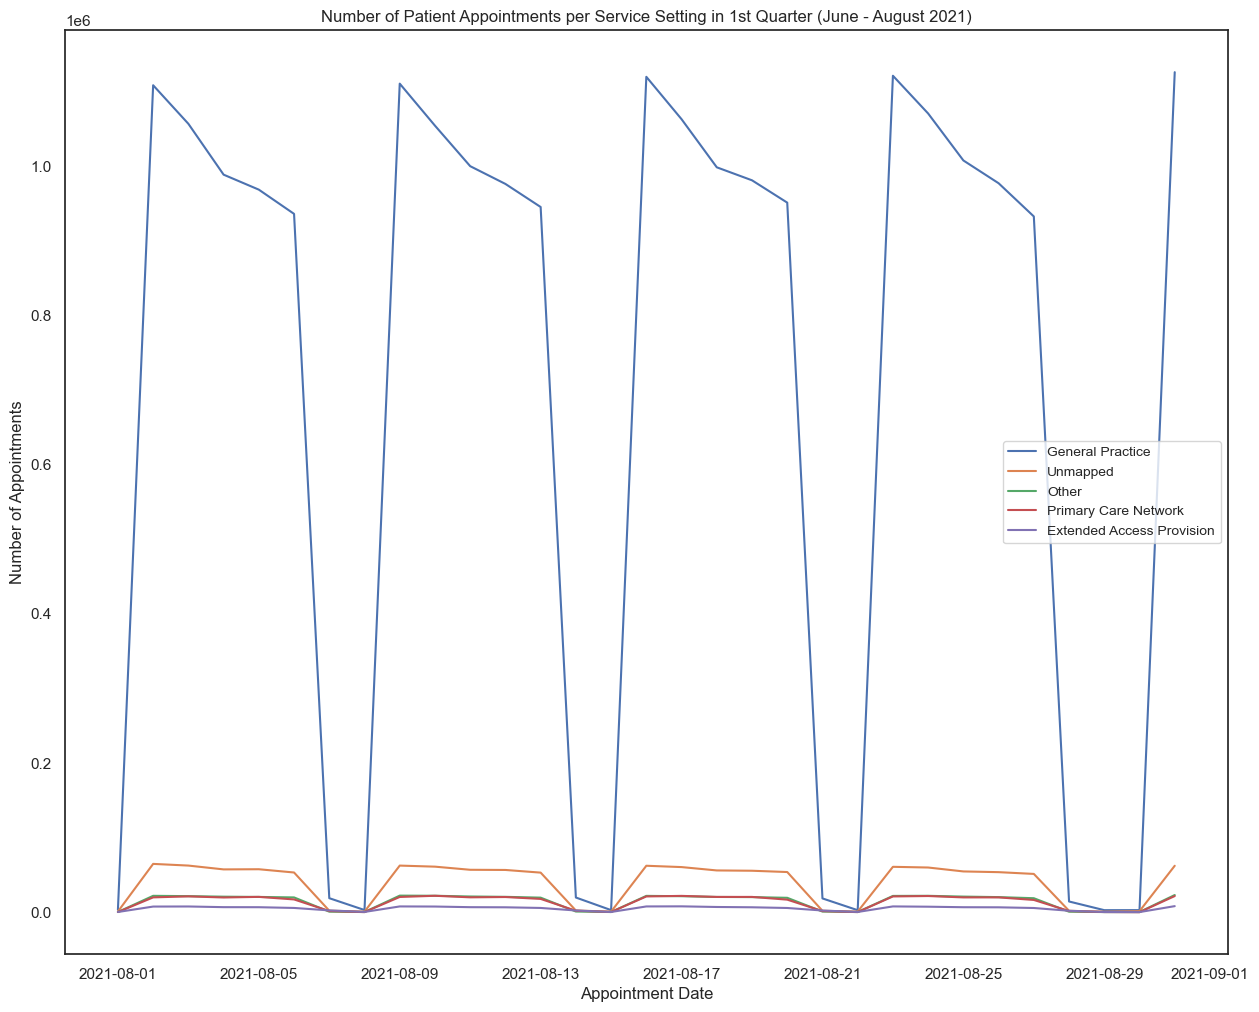

In [876]:
# Look at June to August 2021 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_q1, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Number of Patient Appointments per Service Setting in 1st Quarter (June - August 2021)")
ax.set_xlabel("Appointment Date")
ax.set_ylabel("Number of Appointments")

# Create legend.
ax.legend()

# Specify legend position.
ax.legend(loc='center left')
ax.legend(fontsize=10)
plt.show()

# Save the file in .png format
fig.savefig('quarter1.png', dpi=300)

**Autumn (September to November 2021):**

In [288]:
# Number of appointments in the Autumn quarter in each service categories
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['service_setting','appointment_month', 'appointment_date'])\
.agg({'count_of_appointments': 'sum'}).reset_index().copy()

nc_ss_q2 = nc_ss_day[(nc_ss_day['appointment_month'] >= '2021-09') & 
                     (nc_ss_day['appointment_month'] <= '2021-11')].sort_values('count_of_appointments',ascending=False)

# Step 3: View the new DataFrame
print(nc_ss_q2)

           service_setting appointment_month appointment_date  \
440       General Practice           2021-11       2021-11-15   
433       General Practice           2021-11       2021-11-08   
405       General Practice           2021-10       2021-10-11   
412       General Practice           2021-10       2021-10-18   
447       General Practice           2021-11       2021-11-22   
...                    ...               ...              ...   
717                  Other           2021-09       2021-09-19   
710                  Other           2021-09       2021-09-12   
1114  Primary Care Network           2021-11       2021-11-21   
703                  Other           2021-09       2021-09-05   
1037  Primary Care Network           2021-09       2021-09-05   

      count_of_appointments  
440                 1355190  
433                 1354605  
405                 1352082  
412                 1340464  
447                 1335782  
...                     ...  
717      

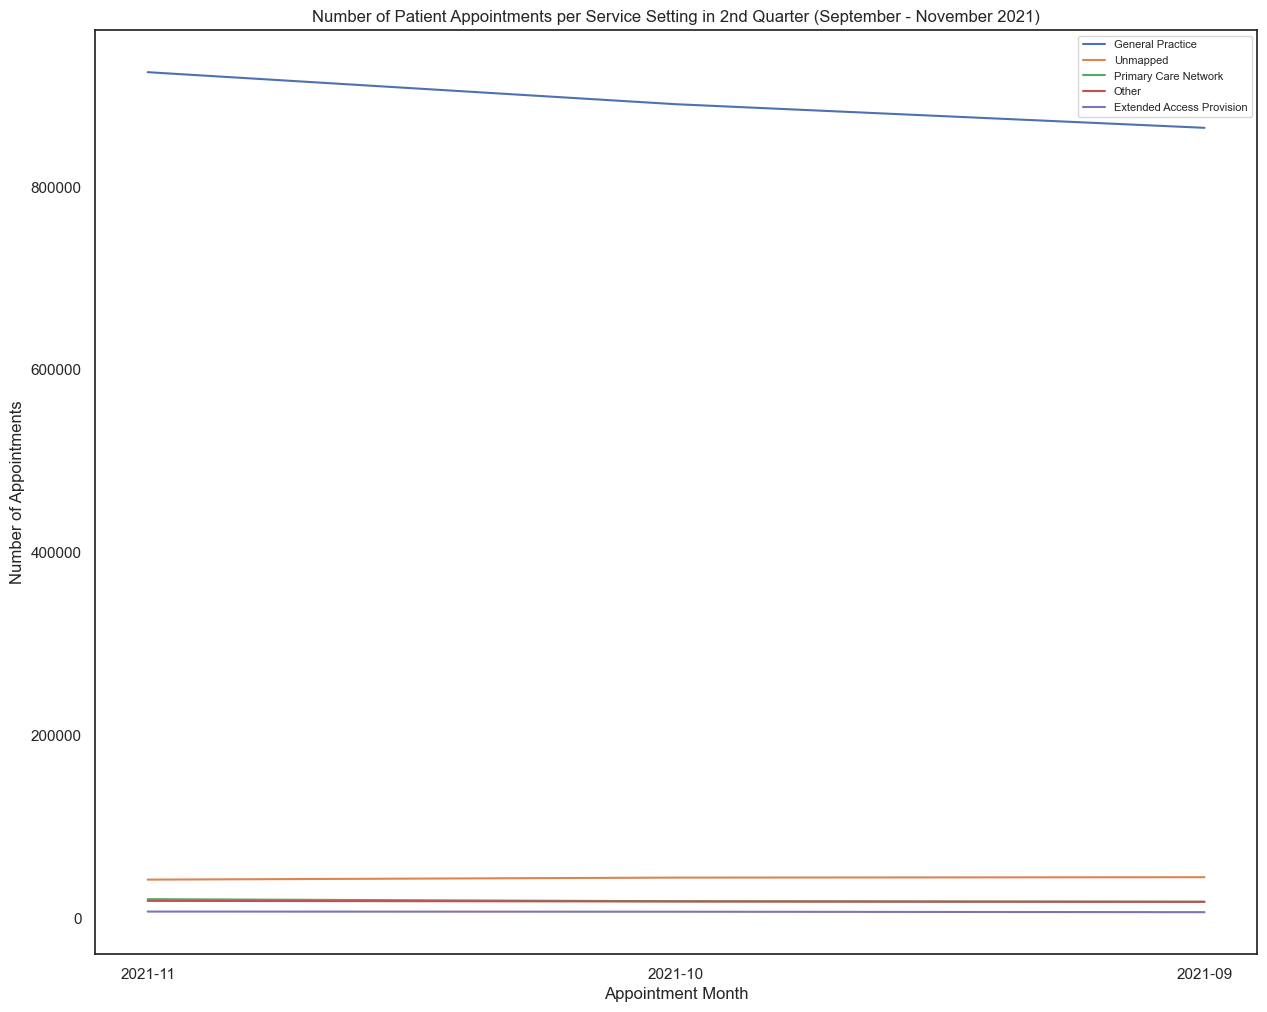

In [326]:
# Look at September to November 2021 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss_q2, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Number of Patient Appointments per Service Setting in 2nd Quarter (September - November 2021)")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of Appointments")


# Create legend.
ax.legend()

# Specify legend position.
ax.legend(loc='center left')
ax.legend(fontsize=8)
plt.show()

# Save the file in .png format
fig.savefig('quarter2.png', dpi=300)

**Winter (December to February 2022):**

In [306]:
# Number of appointments in the Winter quarter in each service categories
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['service_setting','appointment_month', 'appointment_date']).agg({'count_of_appointments': 'sum'}).reset_index().copy()

nc_ss_q3 = nc_ss_day[(nc_ss_day['appointment_month'] >= '2021-12') & 
                     (nc_ss_day['appointment_month'] <= '2022-02')].sort_values('count_of_appointments',ascending=False)

# Step 3: View the new DataFrame
print(nc_ss_q3)

                service_setting appointment_month appointment_date  \
524            General Practice           2022-02       2022-02-07   
517            General Practice           2022-01       2022-01-31   
545            General Practice           2022-02       2022-02-28   
510            General Practice           2022-01       2022-01-24   
461            General Practice           2021-12       2021-12-06   
...                         ...               ...              ...   
814                       Other           2021-12       2021-12-25   
147   Extended Access Provision           2021-12       2021-12-26   
1155       Primary Care Network           2022-01       2022-01-01   
1150       Primary Care Network           2021-12       2021-12-27   
146   Extended Access Provision           2021-12       2021-12-25   

      count_of_appointments  
524                 1310295  
517                 1305082  
545                 1301433  
510                 1296725  
461      

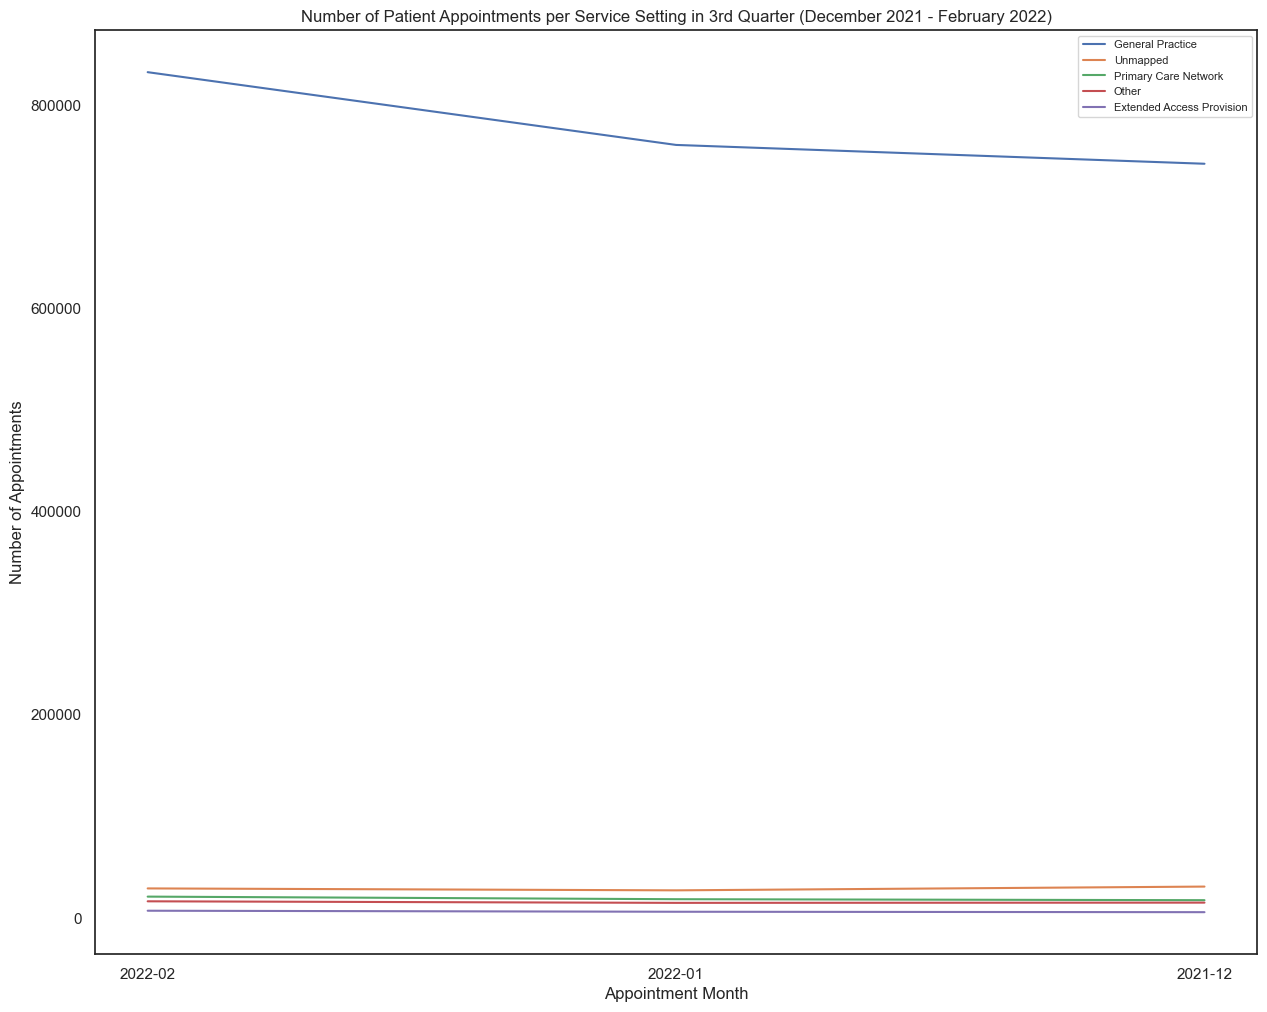

In [328]:
# Look at December 2021 to February 2022 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss_q3, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Number of Patient Appointments per Service Setting in 3rd Quarter (December 2021 - February 2022)")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of Appointments")

# Create legend.
ax.legend()

# Specify legend position.
ax.legend(loc='center left')
ax.legend(fontsize=8)
plt.show()

# Save the file in .png format
fig.savefig('quarter3.png', dpi=300)

**Spring (March to May 2022):**

In [312]:
# Number of appointments in the Spring quarter in each service categories
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['service_setting','appointment_month', 'appointment_date']).agg({'count_of_appointments': 'sum'}).reset_index().copy()

nc_ss_q4 = nc_ss_day[(nc_ss_day['appointment_month'] >= '2022-03') & 
                     (nc_ss_day['appointment_month'] <= '2022-05')].sort_values('count_of_appointments',ascending=False)

# Step 3: View the new DataFrame
print(nc_ss_q4)

           service_setting appointment_month appointment_date  \
629       General Practice           2022-05       2022-05-23   
622       General Practice           2022-05       2022-05-16   
615       General Practice           2022-05       2022-05-09   
552       General Practice           2022-03       2022-03-07   
559       General Practice           2022-03       2022-03-14   
...                    ...               ...              ...   
1247  Primary Care Network           2022-04       2022-04-03   
1262  Primary Care Network           2022-04       2022-04-18   
934                  Other           2022-04       2022-04-24   
927                  Other           2022-04       2022-04-17   
1261  Primary Care Network           2022-04       2022-04-17   

      count_of_appointments  
629                 1334812  
622                 1332523  
615                 1324551  
552                 1312568  
559                 1311098  
...                     ...  
1247     

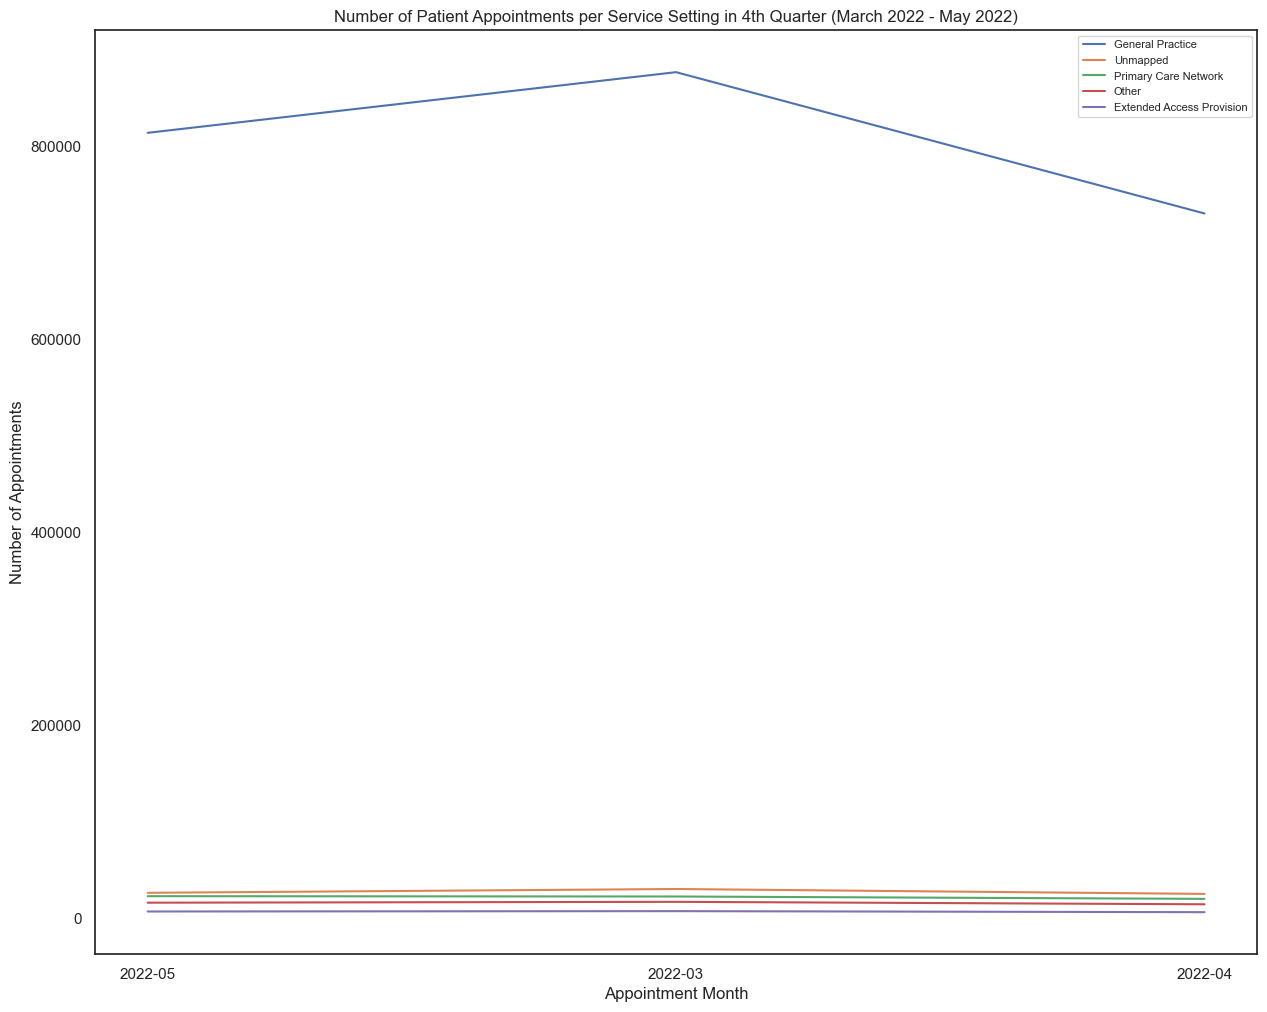

In [330]:
# Look at March 2022 to May 2022 in more detail to allow a closer look.
# Create a lineplot.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss_q4, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Number of Patient Appointments per Service Setting in 4th Quarter (March 2022 - May 2022)")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of Appointments")

# Create legend.
ax.legend()

# Specify legend position.
ax.legend(loc='center left')
ax.legend(fontsize=8)
plt.show()

# Save the file in .png format
fig.savefig('quarter4.png', dpi=300)

# 

## Summary of the Findings:

Number of patients appointments per months by service setting shows that:

1. General Practice has the highest number of appointments per month. 'Care related encouter' outnumbered the other two context type for the highest number of appointments. For national categories the highest number of appointments were recorded by General Consultation Acute and General Consulation Routine.

2. Four additional visualisations were also created to see which service setting reported the most appointments for a specific period or season. In all the four quarters, General Practice recorded the most appointments.It was also noted that in the summer quarter the only appointments recorded were in August. The data shows that the number of appointments were slightly higher during the winter months with the gradual increase from November to March. March recorded the highest readings. In comparison to General Practice, the other service settings recorded quite low number of appointments. 

## Step 5. Identify and review the top trending hashtags (#) related to healthcare in the UK based on the data set received from the NHS.

To find this, I first imported the 'tweet.csv' file and sense checked it. Then I performed the count_values() to explore the number of most retweeted and favourite tweets. Next, I retrieved a list of hashtags using the for loop to compare the most frequently used hashtags.

In [681]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [339]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.head())

              tweet_id                                    tweet_full_text  \
0  1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1  1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2  1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   
3  1567582767625428992  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...   
4  1567582720460570625  ICYMI: Our recent blogs on Cybersecurity in Ac...   

                                      tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices'...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indic...   
2  {'hashtags': [{'text': 'Healthcare', 'indices'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, ...   
4  {'hashtags': [{'text': 'blogs', 'indices': [18...   

                             tweet_entities_hashtags  \
0                                        #Healthcare   
1                            #PremiseHealth, #hiring   
2                               

In [341]:
# Explore the metadata.
print(tweets.info)

<bound method DataFrame.info of                  tweet_id                                    tweet_full_text  \
0     1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1     1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2     1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   
3     1567582767625428992  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...   
4     1567582720460570625  ICYMI: Our recent blogs on Cybersecurity in Ac...   
...                   ...                                                ...   
1169  1567583004209332227  RT @PotomacPhotonic: Potomac #Innovation Repor...   
1170  1567582945342267393  Not a cent towards workers who would like to a...   
1171  1567582936014241792  The @hfmaorg Region 9 presents "The Value of E...   
1172  1567582892892782592  Happy physiotherapy 🩺 day 🎉..\n#bpt #physiothe...   
1173  1567582846847533058  RT @KimcoStaffing: Apply now to work for #Medi...   

       

In [345]:
# Explore the data type
print(tweets.dtypes)

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [343]:
# Explore the data set.
print(tweets.describe())

           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000


In [347]:
# Explore the number of time each tweet is retweeted.
print("Number of Tweets retweeted: ", tweets['tweet_retweet_count'].value_counts())


Number of Tweets retweeted:  tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64


In [349]:
# Explore the number of time each tweet is marked as a favourite tweet.
print("Number of times a tweet is marked as a Favourite: ", tweets['tweet_favorite_count'].value_counts())

Number of times a tweet is marked as a Favourite:  tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


### Question: Why would it be useful to only look at retweeted and favourite tweet messages?

**ANSWER**

The number of times a tweet has been retweeted or marked as a favourite tweet reflects the users’ engagement with your content. It shows that they find it interesting or informative. An analysis of these kind of tweets can help any business or influencer understand the key trends and mood of the audience, and which area they can improve. 
In the context of the NHS scenario, the NHS communication team can make use of this analysis for gleaning an understanding of what the public thinks of its services and as NHS as a whole organisation. They can then use it to address any issues pr make improvement in their services.


### Review the hashtags (#) and create a new DataFrame (e.g. tweets_text) with only text values.


In [686]:
# Initialize lists to store processed tweet text and hashtags
tweets_text = []
tags = []

# Loop through each tweet in the DataFrame

for words in [tweet.split(' ') for tweet in tweets['tweet_full_text'].values]:
    for word in words:
        if '#' in word:
            tags.append(word.lower())

 # Join the words back into a single tweet string and add to tweets_text list
    tweets_text.append(' '.join(tweet_words))

# Create a new DataFrame with the processed tweet text
tweets_text = pd.DataFrame({'tweet_text': tweets_text})

# Create a Pandas Series to count the occurrences of each hashtag.
tags_series = pd.Series(tags).value_counts()

# Step 5: Display the first 30 records of the Series.
print(tags_series.head(30))


#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [690]:
# Step 1: Convert the Series into a DataFrame and reset the index.
data = tags_series.reset_index()

# Step 2: Rename the columns to 'word' and 'count'.
data.columns = ['word', 'count']


In [692]:
# Fix the count datatype.
data['count'] = data['count'].astype(int)

# Sense-check the DataFrame.
print(data.head())  # Display the first few rows to check
print(data.dtypes)


          word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38
word     object
count     int32
dtype: object


In [694]:
# Display records where the count is larger than 10.
filtered_data = data[data['count'] > 10]

filtered_data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


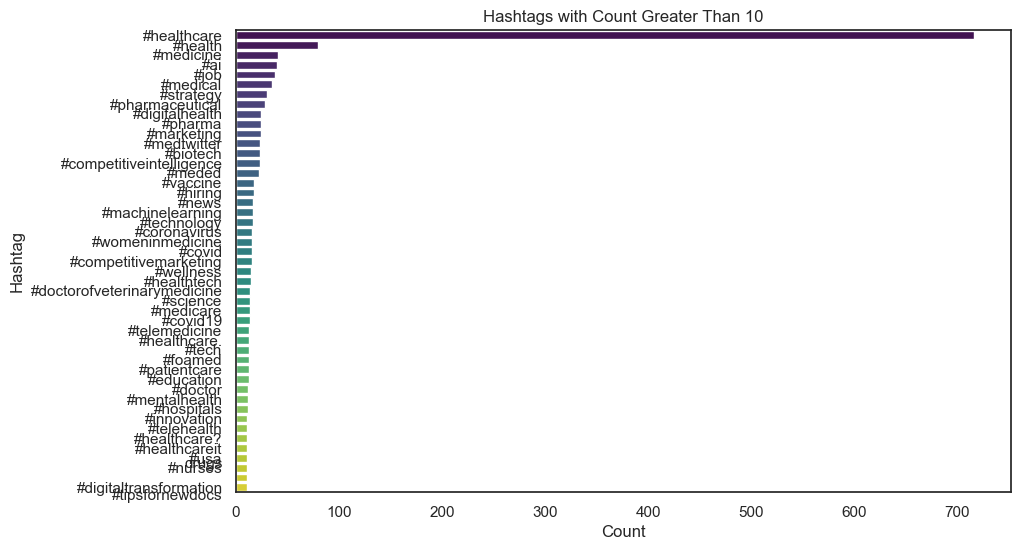

In [696]:
# Create a Seaborn barplot indicating records with a count >10 records.
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=filtered_data, palette='viridis')
plt.title('Hashtags with Count Greater Than 10')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


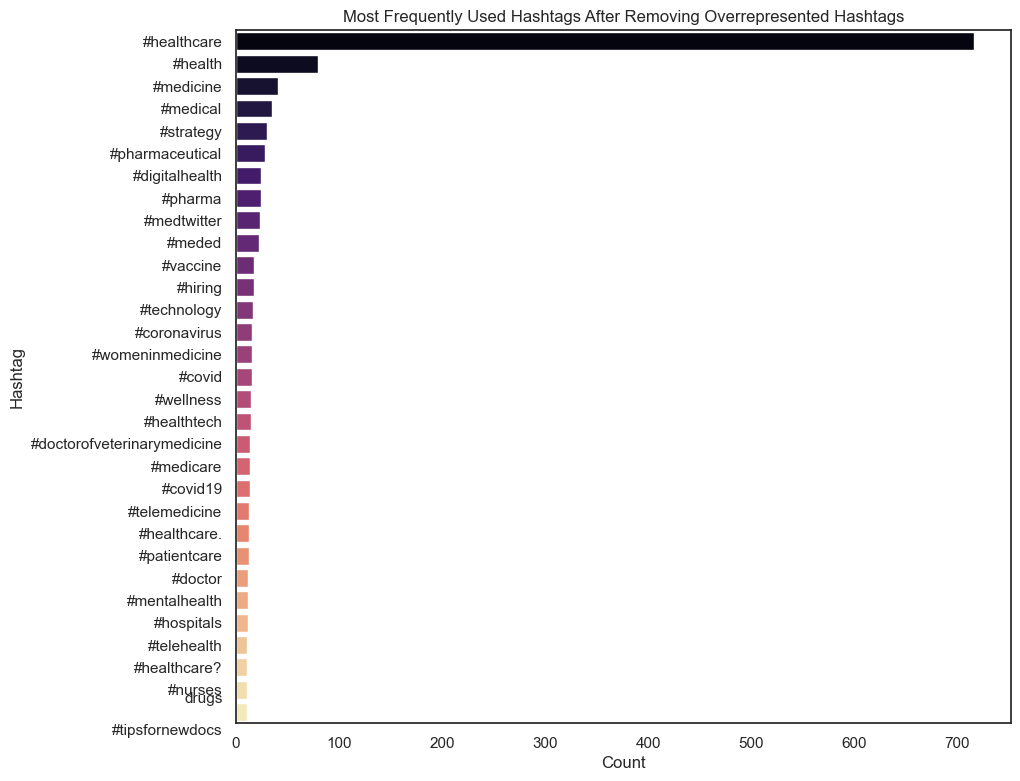

In [701]:
# Step 6: Remove overrepresented hashtags (e.g., #health, #nhs) and create a new barplot.
# Define a list of overrepresented hashtags to remove.
overrepresented_hashtags = ['#job', '#ai', '#marketing', '#tech', '#foamed', '#biotech',\
                            '#competitiveintelligence','#machinelearning','#science',\
                            '#education','#news','#usa','#innovation','#medid','#strategy'\
                           '#healthcare?', '#healthcareit','#competitivemarketing',\
                            '#digitaltransformation','#tipsfornewdocs']

# Filter out the overrepresented hashtags.
filtered_data = filtered_data[~filtered_data['word'].isin(overrepresented_hashtags)]

plt.figure(figsize=(10, 9))
sns.barplot(x='count', y='word', data=filtered_data, palette='magma')
plt.title('Most Frequently Used Hashtags After Removing Overrepresented Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

# Save the file in .png format
fig.savefig('hashtags.png', dpi=300)


## Methodology and Steps taken to create the Barplot from 'tweets.csv' file and to improve the visualisation: 

The data from tweets.csv consists of tweets. The task was to identify the top trending hashtag in a barplot visualisation. First, an empty list was created for text values and then a for loop was performed on the the data to retrieve hashtags and the number of times each hashtag was found in the data. Then the series was converted into a dataframe, the columns were renamed as 'words' and 'count'. The data was filtered so that hashtags with more than 10 counts were retrieved. This data was stored in a new variable called 'filtered_data'. This data was then used to create a barplot, using 'count' in the y-axis and 'words' in the x-axis'. The resulting barplot had overrepresentation of unnecessary hashtags, which are written below: 


('#job', '#ai', '#marketing', '#tech', '#foamed', '#biotech',\
                            '#competitiveintelligence','#machinelearning','#science',\
                            '#education','#news','#usa','#innovation','#medid','#strategy'\
                           '#healthcare?', '#healthcareit','#competitivemarketing',\
                            '#digitaltransformation','#tipsfornewdocs')

These hashtags were removed to declutter and improve the look of the barplot. The resulting barplot shows that the top trending hashtag is 'Healthcare'. This shows that people find any piece of information related to this hashtag to be interesting and informative.


## How NHS can use Twitter:

In this age of technology, most people use social media for keeping themselves up to date. Twitter, as one of the most popular social media platform, can be effectively used by the NHS to connect with its target audience to,

1. Make patients aware of all the services it offers. This may include educating people about various other under utilised resources.

2. Use 'healthcare' hashtag, Mobile App Promotion and Twitter Amplify to dissiminate information about itself.

3. To get patients' feeedback on their services and improve them.

# 

## Step 6: Make recommendations to the NHS. 

For this part of analysis, I created a dataframe based on appointments_regional.csv files and data from August 2021 to June 2022. Using this dataframe I plotted several lineplots and 3 boxplots to explore trends between number of appoints over time and  

In [638]:
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.head())

  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


In [497]:
# Print the min and max dates.
print(f'The minimum date of the data is: ', ar['appointment_month'].min())
print(f'The maximum date of the data is: ', ar['appointment_month'].max())



The minimum date of the data is:  2020-01
The maximum date of the data is:  2022-06


In [887]:
# Filter the data set to only look at data from 2021-08 onwards.
filter_ar = ar[(ar['appointment_month']>='2021-08')&
               (ar['appointment_month']<='2022-06')]
            

print(filter_ar)

       icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034           2021-08           Attended       GP   
3653      E54000034           2021-08           Attended       GP   
3654      E54000034           2021-08           Attended       GP   
3655      E54000034           2021-08           Attended       GP   
3656      E54000034           2021-08           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to

**Question 1:** Should the NHS start looking at increasing staff levels? 

### Create a new data set

In [595]:
# Create an aggregated data set to review the different features.
ar_agg = filter_ar.groupby(['appointment_month', 'hcp_type', 'appointment_status',\
                           'appointment_mode', 'time_between_book_and_appointment'])\
.agg({'count_of_appointments': 'sum'}).reset_index().copy()

# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


### Determine average utilisation of services

In [994]:
# Determine the total number of appointments per month.
ar_df = filter_ar.groupby(filter_ar['appointment_month'])\
.agg({'count_of_appointments': 'sum'}).reset_index().copy()

# Add a new column to indicate the average utilisation of services.
# Define a new variable to store utilisation (Monthly aggregate / 30 to get to a daily value)
ar_df['utilisation'] = round(ar_df['count_of_appointments'] / 30)
# View the DataFrame.

# Convert the appointment month to string type.
ar_df['appointment_date_str'] = ar_df['appointment_month'].astype(str)

# Create a new dataframe with utilisation in the groupbyar_df_edit = ar_df['utilisation', 'appointment_date_str']

# View the dataframe
ar_df

,appointment_month,count_of_appointments,utilisation,appointment_date_str
0,2021-08,23852171,795072.0,2021-08
1,2021-09,28522501,950750.0,2021-09
2,2021-10,30303834,1010128.0,2021-10
3,2021-11,30405070,1013502.0,2021-11
4,2021-12,25140776,838026.0,2021-12
5,2022-01,25635474,854516.0,2022-01
6,2022-02,25355260,845175.0,2022-02
7,2022-03,29595038,986501.0,2022-03
8,2022-04,23913060,797102.0,2022-04
9,2022-05,27495508,916517.0,2022-05


In [974]:
# Convert the appointment_month to string data type for ease of visualisation.
ar_agg['appointment_date_str'] = ar_agg['appointment_month'].astype(str)


#View apppointment_date columns for dataframe
print(ar_agg['appointment_date_str'])



0       2021-08
1       2021-08
2       2021-08
3       2021-08
4       2021-08
         ...   
3749    2022-06
3750    2022-06
3751    2022-06
3752    2022-06
3753    2022-06
Name: appointment_date_str, Length: 3754, dtype: object
0     2021-08
1     2021-09
2     2021-10
3     2021-11
4     2021-12
5     2022-01
6     2022-02
7     2022-03
8     2022-04
9     2022-05
10    2022-06
Name: appointment_date_str, dtype: object


### Create a Lineplot for the number of monthly visit over 11 months (August 2021 to June 2022)

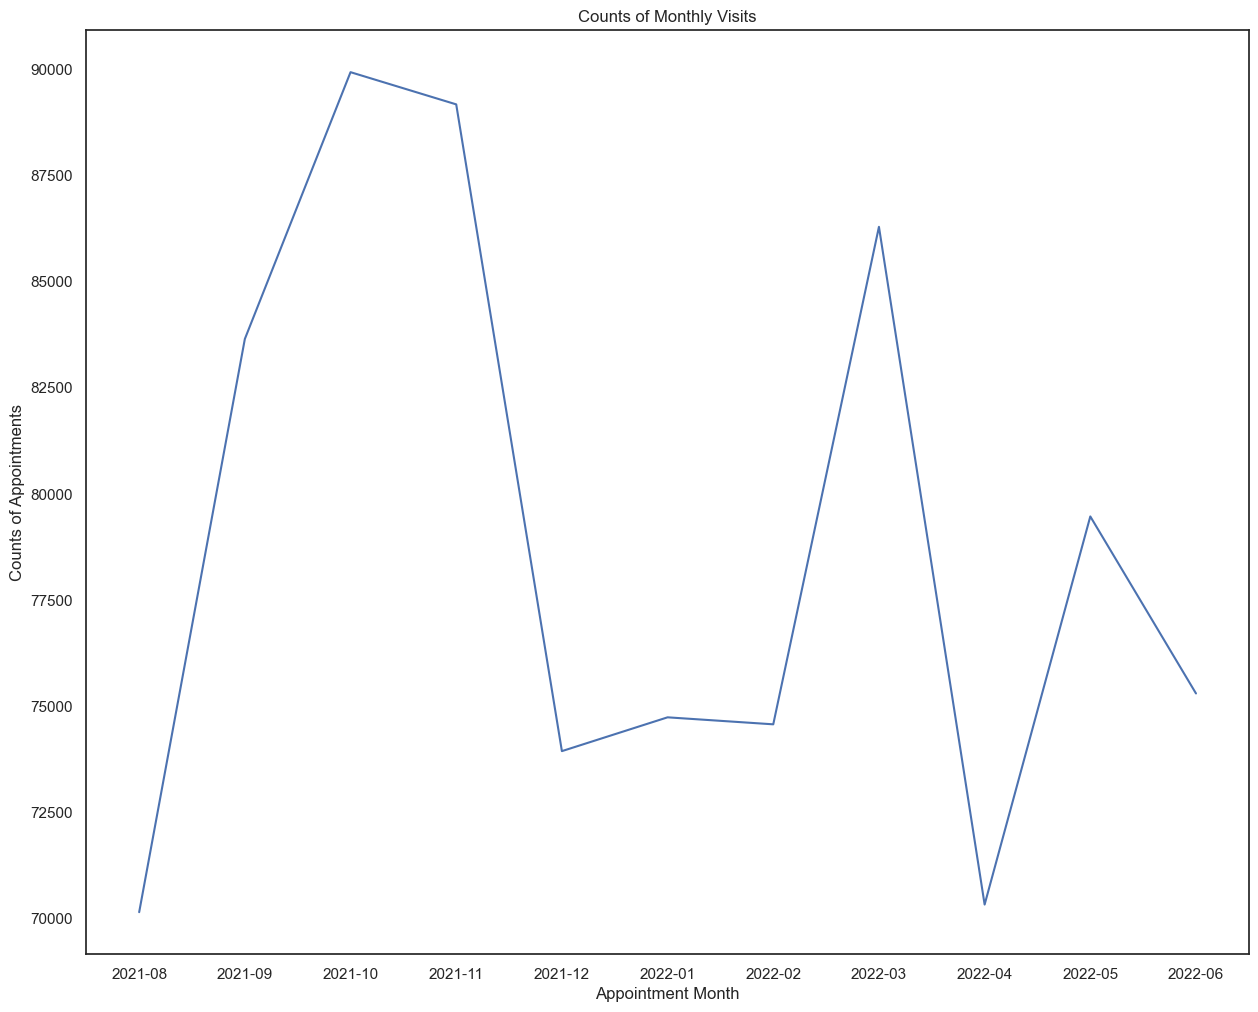

In [557]:
# Create a lineplot with Seaborn.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_agg, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Counts of Monthly Visits")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Counts of Appointments")

plt.show()

# Save the file in .png format
fig.savefig('montly_counts.png', dpi=300)

### Plot monthly capacity utilisation

***The NHS has provided a figure of an average of 1,200,000 appointments per day being used for planning purposes, which can be used as a guideline for maximum capacity.***
*On the plot each tick on the y-axis is at 100000 interval.* 

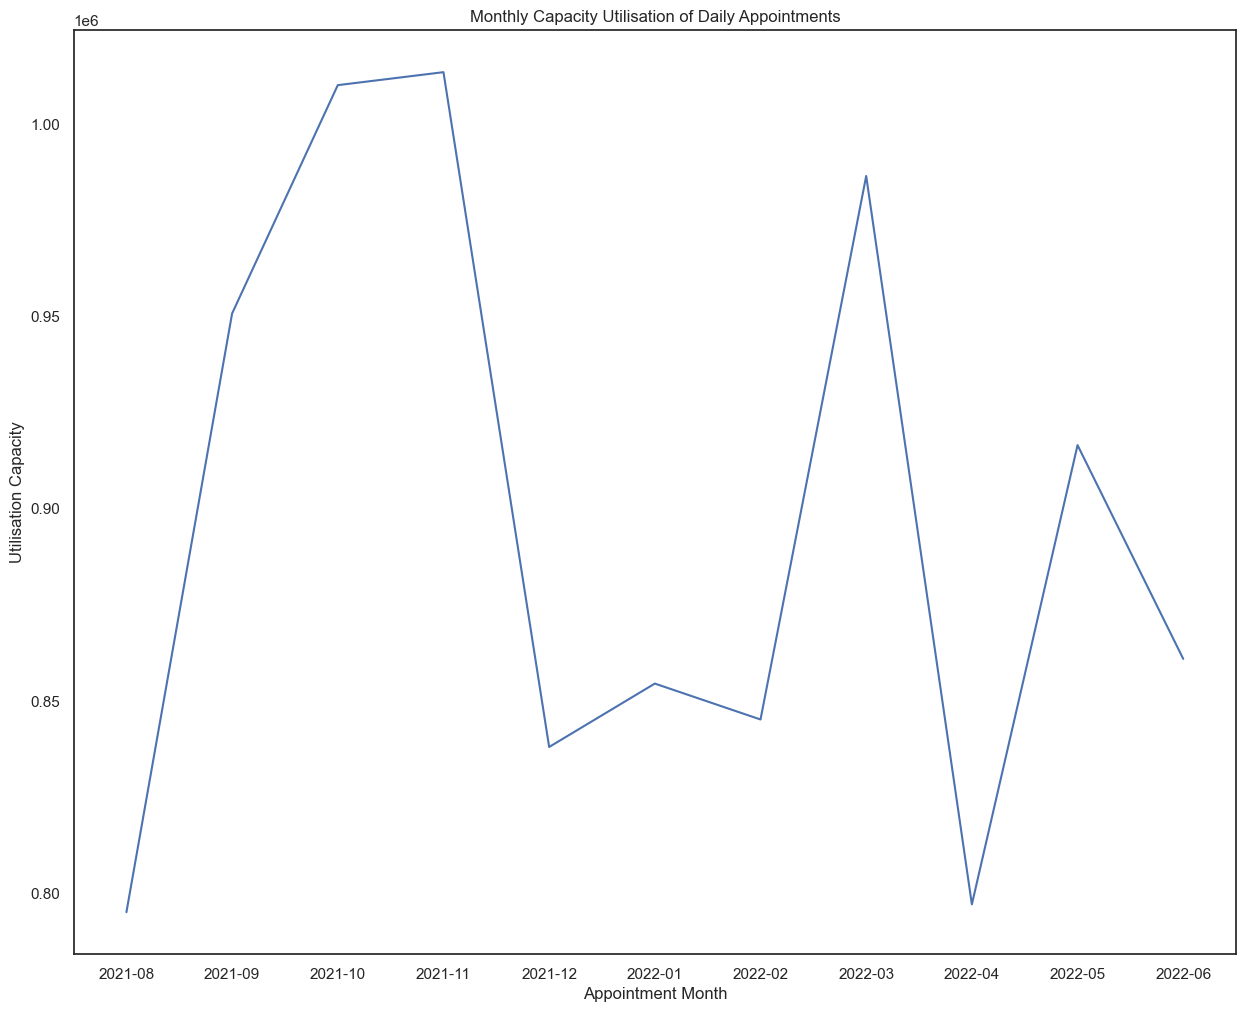

In [998]:
# Plot monthly capacity utilisation.
# Create a lineplot with Seaborn.
fig, ax = plt.subplots()

sns.lineplot(x='appointment_month', y='utilisation', data=ar_df, errorbar=None)

# Format the title and x and y axes labels
ax.set_title("Monthly Capacity Utilisation of Daily Appointments")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Utilisation Capacity")

plt.show()

# Save the file in .png format
fig.savefig('utilisation.png', dpi=300)



### Healthcare Professionals over time
**Question 2:** How do the healthcare professional types differ over time?

In [1000]:
# Step 1: Group the data by time variable and healthcare professionaltype.
# Create another column for the number for each hcp 
ar_hcp = filter_ar.groupby(['appointment_month', 'hcp_type']).size().reset_index(name='count')

# View the dataframe
ar_hcp


,appointment_month,hcp_type,count
0,2021-08,GP,7507
1,2021-08,Other Practice staff,7932
2,2021-08,Unknown,4347
3,2021-09,GP,7720
4,2021-09,Other Practice staff,8134
5,2021-09,Unknown,4587
6,2021-10,GP,7756
7,2021-10,Other Practice staff,8231
8,2021-10,Unknown,4575
9,2021-11,GP,7807


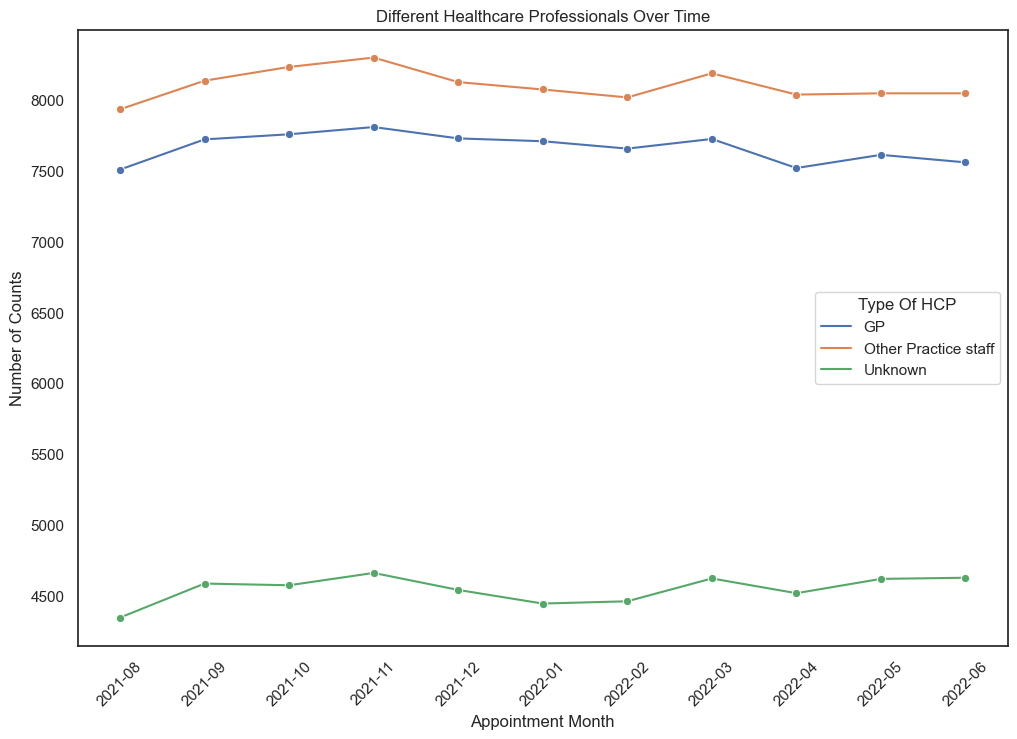

In [901]:
# Step 2: Create the line plot using Seaborn.
plt.figure(figsize=(12, 8))
sns.lineplot(x='appointment_month', y='count', hue='hcp_type', data=ar_hcp, marker='o')

# Step 3: Add titles and labels to the plot.
plt.title('Different Healthcare Professionals Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Type Of HCP')

# Display the plot.
plt.show()

# Save the file in .png format
fig.savefig('HCPCount.png',dpi=300)


### Status of Visit Appointments over time.
**Question 3:** Are there significant changes in whether or not visits are attended?

In [1006]:
# Step 1: Group the data by time variable and hospital visit status.
status_counts = filter_ar.groupby(['appointment_month', 'appointment_status']).size().reset_index(name='count')

status_counts

,appointment_month,appointment_status,count
0,2021-08,Attended,7826
1,2021-08,DNA,5433
2,2021-08,Unknown,6527
3,2021-09,Attended,7998
4,2021-09,DNA,5644
5,2021-09,Unknown,6799
6,2021-10,Attended,8003
7,2021-10,DNA,5748
8,2021-10,Unknown,6811
9,2021-11,Attended,8059


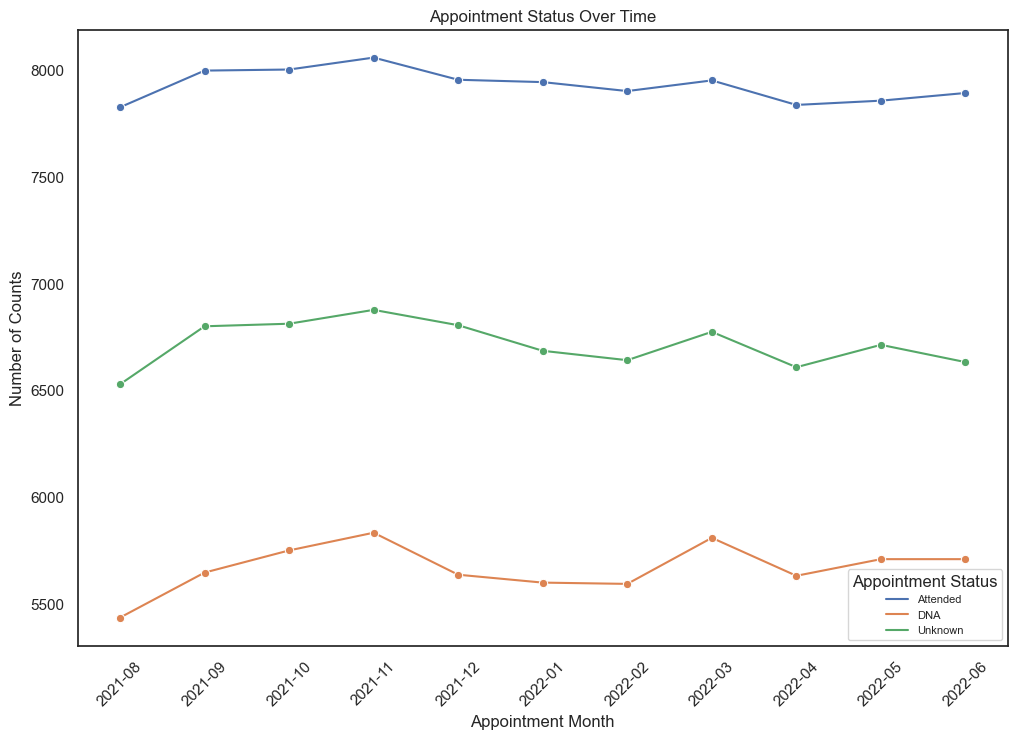

In [1008]:
# Step 2: Create the line plot using Seaborn.
plt.figure(figsize=(12, 8))
sns.lineplot(x='appointment_month', y='count', hue='appointment_status', data=status_counts, marker='o')

# Step 3: Add titles and labels to the plot.
plt.title('Appointment Status Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Appointment Status', fontsize=8)


# Display the plot.
plt.show()

# Save the file as png
fig.savefig('appointment_status.png', dpi=300)

### Change in Appointment type over Time.
**Question 4:** Are there changes in terms of appointment type and the busiest months?

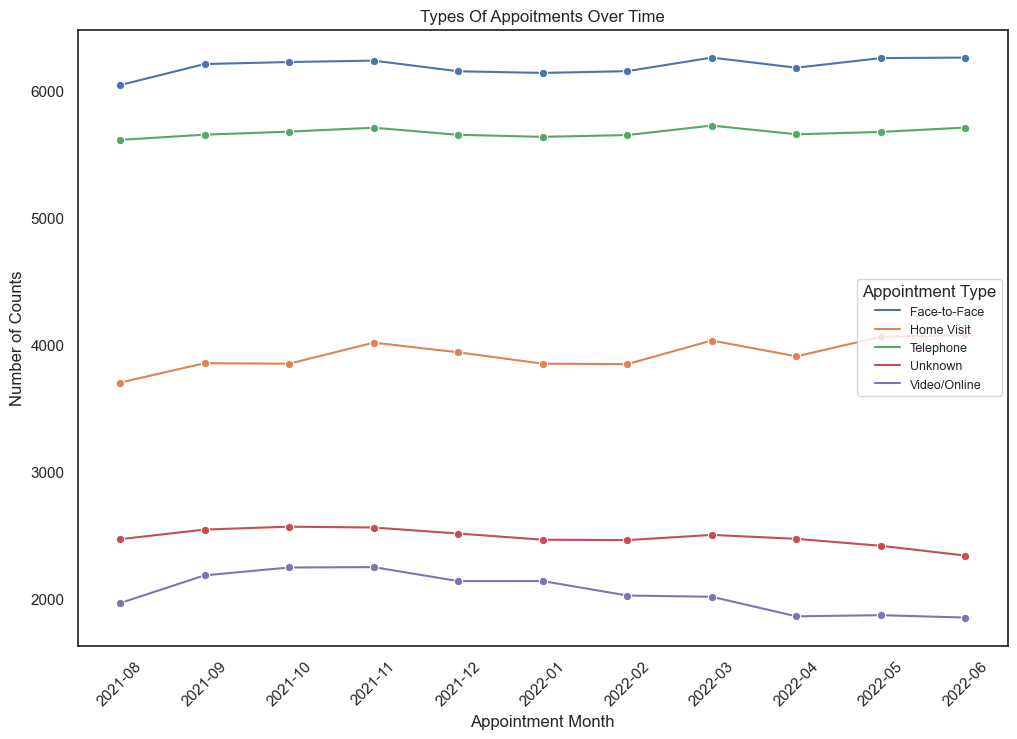

In [957]:
# Create a line plot to answer the question.
# Step 1: Group the data by time variable and hospital visit status.
ar_app_types = filter_ar.groupby(['appointment_month', 'appointment_mode']).size().reset_index(name='count')

# Step 2: Create the line plot using Seaborn.
plt.figure(figsize=(12, 8))
sns.lineplot(x='appointment_month', y='count', hue='appointment_mode', data=ar_app_types, marker='o')

# Step 3: Add titles and labels to the plot.
plt.title('Types Of Appoitments Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Appointment Type', fontsize=9, loc='center right')

# Display the plot.
plt.show()

# Save the file as png
fig.savefig('appointment_type.png', dpi=300)

### Trend in the Time Between the Booking and Appointment.
**Question 5:** Are there any trends in time between booking and appointment?

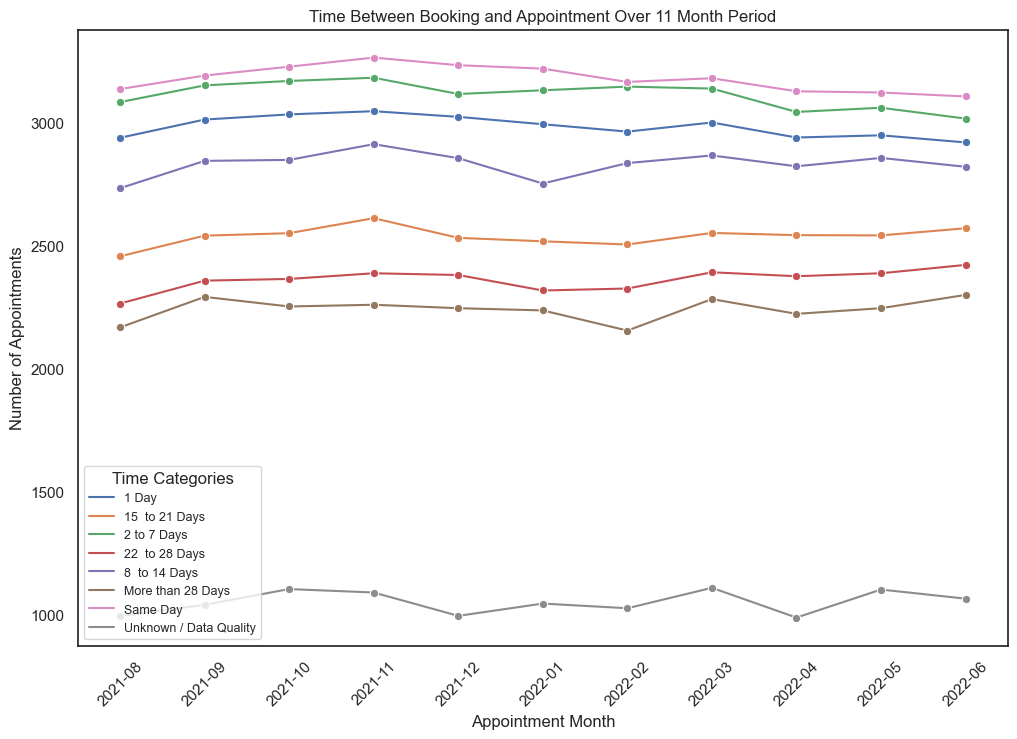

In [951]:
# Create a line plot to answer the question.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by time variable and time difference categories.
time_diff_counts = filter_ar.groupby(['appointment_month', 'time_between_book_and_appointment']).size().reset_index(name='count')

# Step 3: Create the line plot using Seaborn.
plt.figure(figsize=(12, 8))
sns.lineplot(x='appointment_month', y='count', hue='time_between_book_and_appointment', data=time_diff_counts, marker='o')

# Step 4: Add titles and labels to the plot.
plt.title('Time Between Booking and Appointment Over 11 Month Period')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Time Categories', fontsize=9, loc='best')

# Display the plot.
plt.show()

# Save the file as png
fig.savefig('book_attend.png', dpi=300)

**Question 6:** How do the various service settings compare?

In [953]:
# Import the national categories file.
nc = pd.read_excel('national_categories.xlsx')

# Sense check and view the dataframe
print(nc.dtypes)
print(nc.columns)
print(nc.head())

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbri

In [959]:
# Create a DataFrame with daily data.
nc_app = nc.groupby(['appointment_month', 'appointment_date'])\
.agg({'count_of_appointments': 'sum'}).reset_index().copy()

print(nc_app)

    appointment_month appointment_date  count_of_appointments
0             2021-08       2021-08-01                   5627
1             2021-08       2021-08-02                1222768
2             2021-08       2021-08-03                1169920
3             2021-08       2021-08-04                1093532
4             2021-08       2021-08-05                1074043
..                ...              ...                    ...
329           2022-06       2022-06-26                   6574
330           2022-06       2022-06-27                1410883
331           2022-06       2022-06-28                1335598
332           2022-06       2022-06-29                1237258
333           2022-06       2022-06-30                1226746

[334 rows x 3 columns]


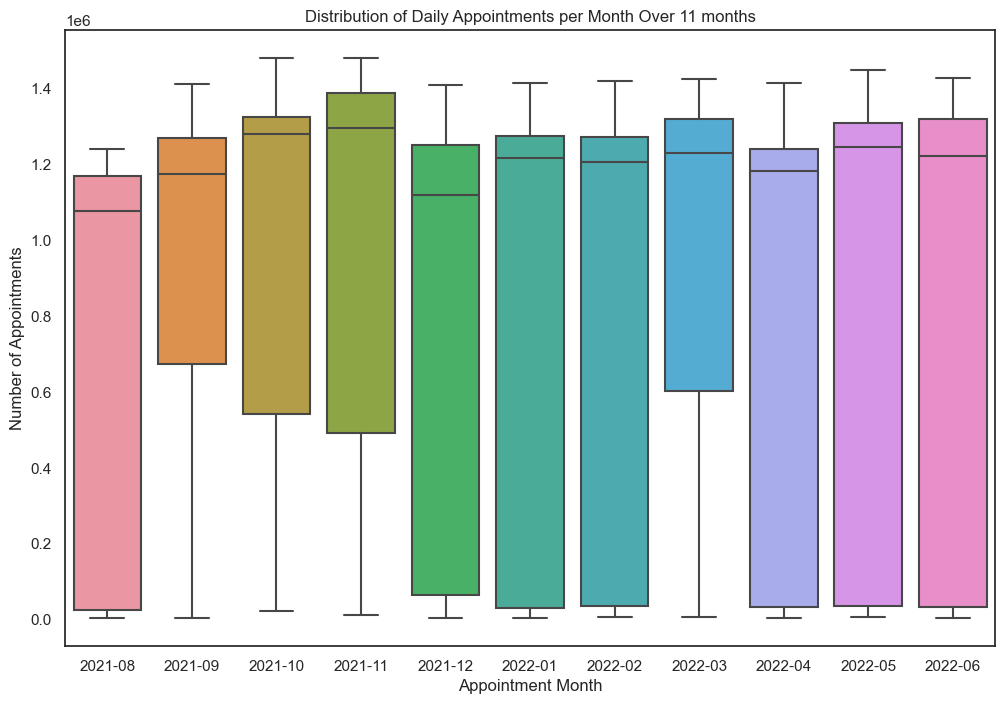

In [961]:
# Create a boxplot to visualize the distribution of daily appointments within each month.
plt.figure(figsize=(12, 8))
sns.boxplot(data=nc_app, x='appointment_month', y='count_of_appointments')

# Add titles and labels to the plot.
plt.title('Distribution of Daily Appointments per Month Over 11 months')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# View the plot
plt.show()

# Save the plot
fig.savefig('total_appointments.png', dpi=300)

In [963]:
# Step 1: Group the data by appointment_month, service_setting, and appointment_date.
# Assuming you have data at the daily level for different service settings:
nc_daily_ss = nc.groupby(['appointment_month', 'service_setting', 'appointment_date']) \
             .agg({'count_of_appointments': 'sum'}).reset_index().copy()

nc_app_ss.head() 


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


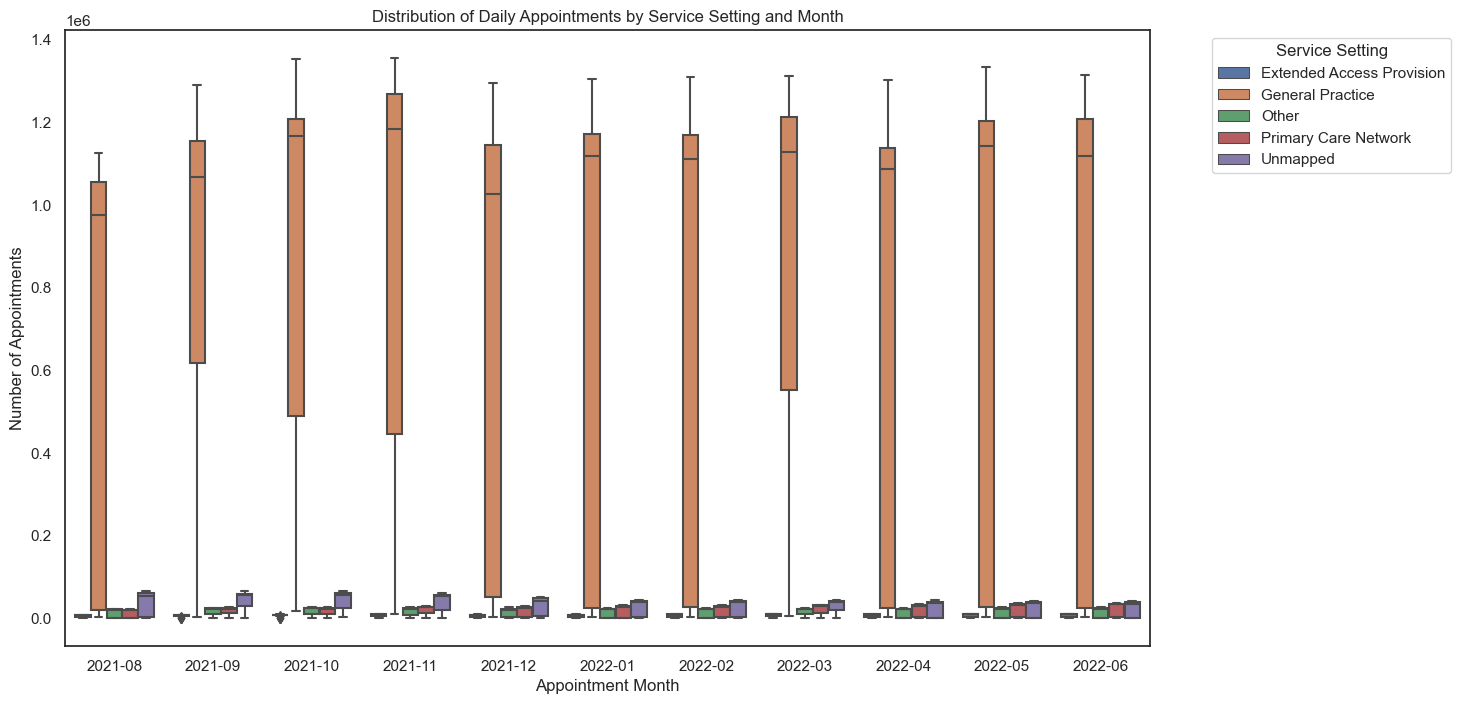

In [965]:
# Step 2: Create the boxplot with service setting as hue.
plt.figure(figsize=(14, 8))
sns.boxplot(data=nc_daily_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')

# Step 3: Add titles and labels to the plot.
plt.title('Distribution of Daily Appointments by Service Setting and Month')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Optional: Improve legend placement and appearance
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: View the plot.
plt.show()

# Save the plot
fig.savefig('ss_appointments.png', dpi=300)

In [967]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
# Create a dataframe that excludes GP service setting.
nc_ngp = nc[nc['service_setting']!='General Practice'].copy()

# Group the data by appointment_month, service_setting without GP, and appointment_date.
nc_ngp_edit = nc_ngp.groupby(['appointment_month', 'service_setting', 'appointment_date']) \
             .agg({'count_of_appointments': 'sum'}).reset_index().copy()

# View the dataframe
nc_ngp_edit

,appointment_month,service_setting,appointment_date,count_of_appointments
0,2021-08,Extended Access Provision,2021-08-01,438
1,2021-08,Extended Access Provision,2021-08-02,7705
2,2021-08,Extended Access Provision,2021-08-03,7820
3,2021-08,Extended Access Provision,2021-08-04,6917
4,2021-08,Extended Access Provision,2021-08-05,6841
...,...,...,...,...
1331,2022-06,Unmapped,2022-06-26,443
1332,2022-06,Unmapped,2022-06-27,40314
1333,2022-06,Unmapped,2022-06-28,37777
1334,2022-06,Unmapped,2022-06-29,35745


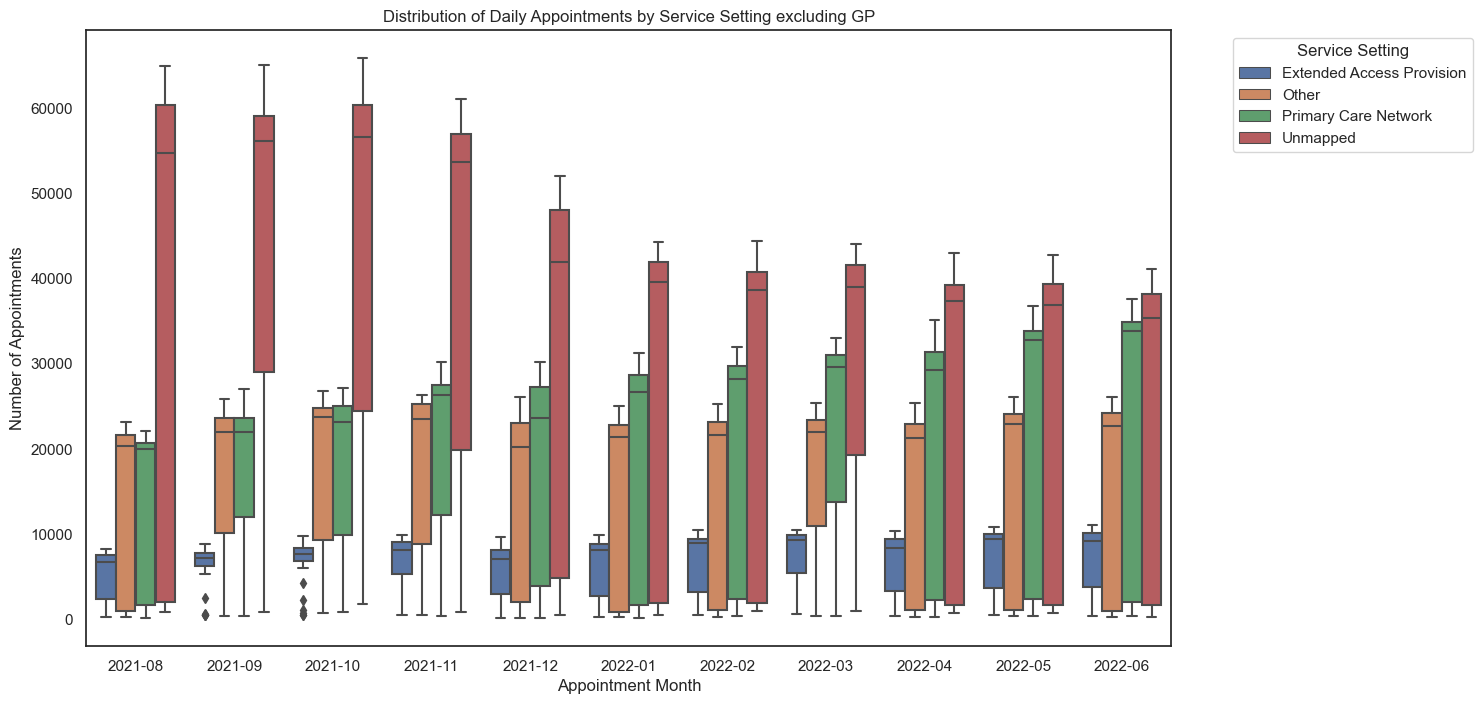

In [969]:
# Step 2: Create the boxplot with service setting as hue, but without GP.
plt.figure(figsize=(14, 8))
sns.boxplot(data=nc_ngp_edit, x='appointment_month', y='count_of_appointments', hue='service_setting')

# Step 3: Add titles and labels to the plot.
plt.title('Distribution of Daily Appointments by Service Setting excluding GP')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Optional: Improve legend placement and appearance
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 4: View the plot.
plt.show()

# Save the plot
fig.savefig('excluding_gp.png', dpi=300)

# 

### Provide a summary of your findings and recommendations based on the analysis.

> The trends between the number of appointments over time and average utilisation (an average calculated by dividing the sum of monthly appointment / 30 to get a daily value) shows a steep rise in the number of appointments during October, November and March. The average utisation of appointments per day is within their budget. The same trend is seen in the graph of HCP over time. The 'Other Practice staff' and 'GPs' are in higher demands during the winter months which matches the increase in the number of patients appointments during October, November and March.
> The highest number of appointment status belongs to the 'Attended' group. Yet there is a significant number of unknown appointments. Some of the  appointments are mistakenly recorded in the unknown category or under recorded because of an inconsistency in the online booking system.	There are data quality issues because of the way the actual duration in minutes of the consultation is recorded differently by the two practice system suppliers – TPP and EMIS. In my opinion, this data is not the actual representation of the appointment status situation.
> The plot shows that the face to face and telephone appointments are more popular than video online. The face to face appointments decrease in winter months and the home visits increase during the same season. According to the metadate file, most of the face to face apointments are booked internally by the staff, who may record a video consultation as a face to face appointment. This shows that the data does not reflect the actual care setting situation. 
> Most of the appointments happen on the same day or within a week.
> The boxplot shows that the highest number of appointments happen in the general practice, followed by the unmapped category.
> The counts of appointment data is not representative of all the practices in England. There are data quality issues as there are lots of inconsistencies in the way data is recorded and it is also not representative data as not all the practices have been part of it. Data for some months is also missing.
> Hence, one has to be carful when making any recommendations.

**My Recommendations**
> 1. Twitter, as one of the most popular social media platform, can be effectively used by the NHS to connect with its target audience to, make 
> patients aware of all the services it offers. This may include educating people about various other under utilised resource NHS could use the
> 'healthcare' hashtag, Mobile App Promotion and Twitter Amplify to dissiminate information about it and healthcare in generals They could also>To get patients' feeedback on their services and impro them.ve
> 2. To avoid data misjudgement and quality issues, NHS should address the reason for the inconsistency in its data collection and improve online booking system. Administrative staff responsible for collecting data should be properly trained.
> 3. Based on the insight gathered about the average utilisation, I think that the current capacity of NHS is adequate and that efforts to make better use of existing infrastructure and resources are sufficient. 
>    
 

 